# Basic test
Tests the basic model defined in the `ContinuousModel` directory, instantiating bees, hives and resources

In [29]:
# Allows to make changes to the classes without restarting the notebook 💀 # TODO: Delete once done
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
from continuous_model.Bee import Bee
from continuous_model.Hive import Hive
from continuous_model.Model import ForagerModel
from continuous_model.Resource import Resource

In [1]:
import mesa
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

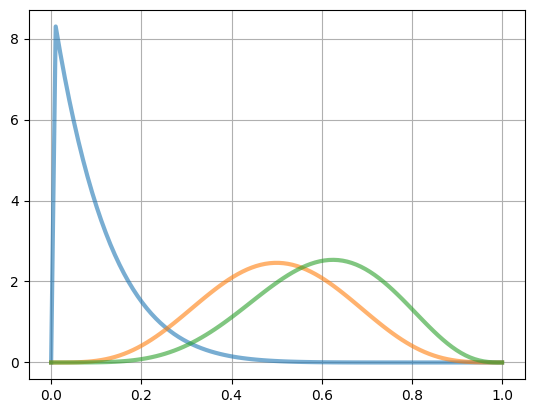

In [58]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.1, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * (mu + np.finfo(np.float32).eps)
    b = phi * (1 - mu - np.finfo(np.float32).eps)

    x = np.linspace(0, 1, 100)
    rvs = beta.rvs(a, b, size=1000)
    plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')

# plt.legend()
plt.grid()
plt.show()

In [53]:
beta.rvs(a, b)

0.4149165407708717

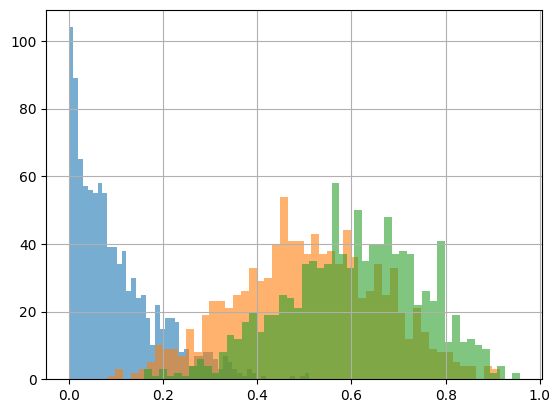

In [49]:
ays = [2, 2, 3]
bees = [2, 3, 2]

mus = [0.1, 0.5, 0.6]
phi = 10

for mu in mus:
    a = phi * mu
    b = phi * (1 - mu)

    x = np.linspace(0, 1, 100)
    rvs = beta.rvs(a, b, size=1000)
    # plt.plot(x, beta.pdf(x, a, b), lw=3, alpha=0.6, label='beta pdf')
    plt.hist(rvs, alpha=0.6, bins=50)

# plt.legend()
plt.grid()
plt.show()

## Instantiate model

In [59]:
SIZE = 500
n_hives = 2
hive_locations = [(100,100), (200,250)]
n_bees_per_hive = [20, 50]
n_resources = 5
resource_locations = [(300,300), (350, 320), (325, 325), (400, 90), (380, 80)]

In [62]:
model = ForagerModel(SIZE, n_hives, hive_locations, n_bees_per_hive, n_resources, resource_locations)

TypeError: slice indices must be integers or None or have an __index__ method

In [34]:
for _ in range(100):
    model = ForagerModel(SIZE, n_hives, hive_locations, n_bees_per_hive, n_resources, resource_locations)
    for agent in model.agents:
        assert agent.pos != None

In [35]:
model.run_model()

KeyboardInterrupt: 

## Plot scenario

In [ ]:
# Create canvas
fig, ax = plt.subplots(dpi=100,figsize=(6,6))

# Set limits of space based on model parameter
ax.set_xlim([-model.size,model.size])
ax.set_ylim([-model.size,model.size])

# Get agents of each type
agents = model.agents
bees = [agent for agent in agents if isinstance(agent, Bee)]
hives = [agent for agent in agents if isinstance(agent, Hive)]
resources = [agent for agent in agents if isinstance(agent, Resource)]

for hive in hives:
    ax.text(hive.location[0],hive.location[1], hive.young_bees)
    ax.scatter(hive.location[0],hive.location[1],c='brown',s=3.14*hive.radius**2,label='Hives')

for bee in bees:
    # Add text indicating their state (0,1,2,3,4)
    ax.text(bee.location[0],bee.location[1], str(bee.state)[6:7])
    ax.scatter(bee.location[0],bee.location[1],c='black',label='Bees')

for resource in resources:
    # TODO: Plot resource scent
    # TODO: Use different color depending on resource
    ax.text(resource.location[0],resource.location[1], resource.quantity)
    ax.scatter(resource.location[0],resource.location[1],c='green',s=3.14*resource.radius**2,label='Resource')


# Show legend but avoid repeating labels (so there is only one per bee)
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.title('Visualization')
plt.tight_layout()
#plt.grid()

In [ ]:
# Create visualization loop

___

## Visualization and simulation test
- Does model.step() many times, and visualizes evolution
- Later on we should be able to create the animation :)

In [ ]:
# Create function for visualization

def visualize(model,dpi=100,figsize=(6,6),step=1):
    # Create canvas
    fig, ax = plt.subplots(dpi=dpi,figsize=figsize)

    # Set limits of space based on model parameter
    ax.set_xlim([-model.size,model.size])
    ax.set_ylim([-model.size,model.size])

    # Get agents of each type
    agents = model.agents
    bees = [agent for agent in agents if isinstance(agent, Bee)]
    hives = [agent for agent in agents if isinstance(agent, Hive)]
    resources = [agent for agent in agents if isinstance(agent, Resource)]

    for hive in hives:
        ax.text(hive.location[0],hive.location[1], hive.young_bees)
        ax.scatter(hive.location[0],hive.location[1],c='brown',s=3.14*hive.radius**2,label=f'Hive {hive.location}')

    for bee in bees:
        # Add text indicating their state (0,1,2,3,4)
        #ax.text(bee.location[0],bee.location[1], str(bee.state)[6:7])
        ax.text(bee.location[0],bee.location[1], '('+str(round(bee.location[0],2))+','+str(round(bee.location[1],2))+')-'+str(bee.state)[6:7])
        ax.scatter(bee.location[0],bee.location[1],c='black',label='Bees')

    for resource in resources:
        # TODO: Plot resource scent
        # TODO: Use different color depending on resource
        ax.text(resource.location[0],resource.location[1], resource.quantity)
        ax.scatter(resource.location[0],resource.location[1],c='green',s=3.14*resource.radius**2,label='Resource')


    # Show legend but avoid repeating labels (so there is only one per bee)
    plt.legend()
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())


    plt.title(f'Visualization (t={step})')
    plt.tight_layout()
#plt.grid()

___

In [ ]:
# Create model, a hive, a bee and a single resource
model = ForagerModel(SIZE=10)
HIVE = model.create_agent(Hive, location=(0,0))
model.create_agent(Bee, hive=HIVE,location=(0,0))
model.create_agent(Resource, location=(3,3))

In [ ]:
STEPS = 5
for step in range(STEPS):
    visualize(model,dpi=80,figsize=(5,5),step=step)
    model.step()
    
    

In [ ]:
for bee in bees:
        # Add text indicating their state (0,1,2,3,4)
        print(bee.location,bee.state)

## Animation test
- Saves the figures of each time step in an array
- Creates an animation out of them

In [ ]:
# Create model, a hive, a bee and a single resource
model = Model(SIZE=10)
HIVE = model.create_agent(Hive, location=(0,0))
model.create_agent(Bee, hive=HIVE,location=(0,0))
model.create_agent(Resource, location=(3,3))

STEPS = 5
figures = []
for step in range(STEPS):
    figures.append([visualize(model,dpi=80,figsize=(5,5),step=step)])
    model.step()

In [ ]:
# Based on PLT tutorial at https://matplotlib.org/stable/gallery/animation/dynamic_image.html
# and https://matplotlib.org/stable/gallery/animation/simple_scatter.html
import matplotlib.animation as animation

fig, ax = plt.subplots()


ani = animation.ArtistAnimation(fig, figures, interval=50, blit=True,
                                repeat_delay=1000)

ani.save("movie.mp4")

In [ ]:

import matplotlib.animation as animation 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots() 

def update(i):
    # This does not work, likely because animation must plot eveyrhing at each step instead of working with the resulting figure with text and legend etc...
    return figures[i]

ani = animation.FuncAnimation(fig, update, frames=len(figures), interval=50, blit=True)
ani.save("animation.mp4")
plt.show()
